# Project Name : Medicare Monthly Enrollment Methodology Analytics Project

*The Medicare Monthly Enrollment data file presents Medicare monthly and yearly enrollee counts by 
geographic area (state/territory and county) beginning with calendar year 2013. The file includes counts 
for the following:
• Total Medicare beneficiaries
• Original Medicare beneficiaries (i.e. Fee-for-Service)
• Medicare Advantage & other health plan beneficiaries
• Aged beneficiaries
• Disabled beneficiaries
• Total Part D (prescription drug) beneficiaries
• Stand-Alone Prescription Drug Plan beneficiaries
• Medicare Advantage Prescription Drug Plan beneficiaries
• Part D Low-income subsidy beneficiaries*

*The yearly Medicare enrollee counts are determined using a person-year methodology. For each 
calendar year, total person-year counts are determined by summing the total number of months that 
each beneficiary is enrolled during the year and dividing by 12. Using this methodology, a beneficiary’s 
partial-year enrollment may be counted in more than 1 category (i.e., entitlement type, health care 
delivery, plan type, and low-income subsidy eligibility category). 
The monthly counts represent Medicare beneficiaries enrolled in the given month*

Importing necessary Python Libraries. Import pandas, matpotlib and seaborn Libraries.

In [26]:
# Python Code to import libraries
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib as plt
from matplotlib import pyplot as pllt
import seaborn as sns

In [30]:
# Path of the file to read
filepath = "/kaggle/input/medicare-monthly-enrollment-data/Medicare Monthly Enrollment Data_August 2023.csv"
data=pd.read_csv(filepath,index_col="YEAR", parse_dates=True)

In [31]:
#Check rows and columns of the pandas dataframe
data.shape

(460290, 25)

In [32]:
#Check the structure of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 460290 entries, 2013-01-01 to 2023-01-01
Data columns (total 25 columns):
 #   Column                                        Non-Null Count   Dtype 
---  ------                                        --------------   ----- 
 0   MONTH                                         460290 non-null  object
 1   BENE_GEO_LVL                                  460290 non-null  object
 2   BENE_STATE_ABRVTN                             460290 non-null  object
 3   BENE_STATE_DESC                               460290 non-null  object
 4   BENE_COUNTY_DESC                              460290 non-null  object
 5   BENE_FIPS_CD                                  460290 non-null  object
 6   TOT_BENES                                     460290 non-null  object
 7   ORGNL_MDCR_BENES                              460290 non-null  object
 8   MA_AND_OTH_BENES                              460290 non-null  object
 9   AGED_TOT_BENES                             

In [33]:
data.head()

,MONTH,BENE_GEO_LVL,BENE_STATE_ABRVTN,BENE_STATE_DESC,BENE_COUNTY_DESC,BENE_FIPS_CD,TOT_BENES,ORGNL_MDCR_BENES,MA_AND_OTH_BENES,AGED_TOT_BENES,...,A_B_TOT_BENES,A_B_ORGNL_MDCR_BENES,A_B_MA_AND_OTH_BENES,PRSCRPTN_DRUG_TOT_BENES,PRSCRPTN_DRUG_PDP_BENES,PRSCRPTN_DRUG_MAPD_BENES,PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES,PRSCRPTN_DRUG_FULL_LIS_BENES,PRSCRPTN_DRUG_PARTIAL_LIS_BENES,PRSCRPTN_DRUG_NO_LIS_BENES
YEAR,,,,,,,,,,,,,,,,,,,,,
2013-01-01,Year,National,US,National,Total,,52425659,37613096,14812563,43761388,...,47620905,32831884,14789022,35679758,22661451,13018307,10000861,1030113.0,409204.0,24239580
2013-01-01,Year,State,AL,Alabama,Total,01,921477.0,711448.0,210029.0,698720.0,...,857619.0,647647.0,209972.0,637247.0,437749.0,199498.0,205496.0,32790.0,11452.0,387510.0
2013-01-01,Year,County,AL,Alabama,Autauga,01001,9323.0,6484.0,2840.0,7088.0,...,8708.0,5868.0,2840.0,6036.0,3268.0,2767.0,1839.0,296.0,105.0,3796.0
2013-01-01,Year,County,AL,Alabama,Baldwin,01003,41033.0,28775.0,12258.0,34162.0,...,38559.0,26304.0,12255.0,27352.0,15593.0,11759.0,5276.0,867.0,379.0,20830.0
2013-01-01,Year,County,AL,Alabama,Barbour,01005,5847.0,5036.0,810.0,4257.0,...,5456.0,4645.0,810.0,4170.0,3410.0,759.0,1783.0,304.0,73.0,2009.0


In [34]:
# get the number of missing data points per column
missing_values_count = data.isnull().sum()
# look at the # of missing points in the first ten columns
missing_values_count[0:10]

MONTH                0
BENE_GEO_LVL         0
BENE_STATE_ABRVTN    0
BENE_STATE_DESC      0
BENE_COUNTY_DESC     0
BENE_FIPS_CD         0
TOT_BENES            0
ORGNL_MDCR_BENES     0
MA_AND_OTH_BENES     0
AGED_TOT_BENES       0
dtype: int64

In [35]:
## remove all the rows that contain a missing value
#nfl_data.dropna()
#df.replace('*', pd.NA, inplace=True)

In [36]:
# helpful modules
import fuzzywuzzy
from fuzzywuzzy import process
import chardet

# set seed for reproducibility
np.random.seed(0)

In [37]:
# look at the first ten thousand bytes to guess the character encoding
with open("../input/medicare-monthly-enrollment-data/Medicare Monthly Enrollment Data_August 2023.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))

# check what the character encoding might be
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [38]:
# read in the dataset
Med_enrolls = pd.read_csv("../input/medicare-monthly-enrollment-data/Medicare Monthly Enrollment Data_August 2023.csv", 
                              encoding='Windows-1252')

# Now can start with data pre-processing

In [39]:
# get all the unique values in the 'TOT_BENS' column
Total_ben = data['TOT_BENES'].unique()

# sort them alphabetically and then take a closer look
Total_ben.sort()
Total_ben

array(['*', '0.0', '100.0', ..., '99994.0', '99995.0', '99997.0'],
      dtype=object)

In [40]:
data["TOT_BENES"].isin(["*"]).sum()

7518

In [41]:
data['TOT_BENES'] = pd.to_numeric(data['TOT_BENES'], errors='coerce').fillna(0).astype(int)    

In [42]:
# get all the unique values in the 'ORGNL_MDCR_BENES' column
Mdcr_ben = data['ORGNL_MDCR_BENES'].unique()

# sort them alphabetically and then take a closer look
Mdcr_ben.sort()
Mdcr_ben

array(['*', '0.0', '100.0', ..., '9999.0', '99997.0', '99998.0'],
      dtype=object)

In [43]:
data["ORGNL_MDCR_BENES"].isin(["*"]).sum()

15439

In [44]:
data['ORGNL_MDCR_BENES'] = pd.to_numeric(data['ORGNL_MDCR_BENES'], errors='coerce').fillna(0).astype(int) 

In [45]:
data["ORGNL_MDCR_BENES"].isin(["*"]).sum()

0

In [46]:
# get all the unique values in the 'ORGNL_MDCR_BENES' column
Ma_ben = data['MA_AND_OTH_BENES'].unique()

# sort them alphabetically and then take a closer look
Ma_ben.sort()
Ma_ben

array(['*', '0.0', '100.0', ..., '99986.0', '9999.0', '99996.0'],
      dtype=object)

In [47]:
data["MA_AND_OTH_BENES"].isin(["*"]).sum()

15439

In [48]:
data['MA_AND_OTH_BENES'] = pd.to_numeric(data['MA_AND_OTH_BENES'], errors='coerce').fillna(0).astype(int) 

In [49]:
#Null values checking
data.isna().sum()/len(data)*100

MONTH                                           0.0
BENE_GEO_LVL                                    0.0
BENE_STATE_ABRVTN                               0.0
BENE_STATE_DESC                                 0.0
BENE_COUNTY_DESC                                0.0
BENE_FIPS_CD                                    0.0
TOT_BENES                                       0.0
ORGNL_MDCR_BENES                                0.0
MA_AND_OTH_BENES                                0.0
AGED_TOT_BENES                                  0.0
AGED_ESRD_BENES                                 0.0
AGED_NO_ESRD_BENES                              0.0
DSBLD_TOT_BENES                                 0.0
DSBLD_ESRD_AND_ESRD_ONLY_BENES                  0.0
DSBLD_NO_ESRD_BENES                             0.0
A_B_TOT_BENES                                   0.0
A_B_ORGNL_MDCR_BENES                            0.0
A_B_MA_AND_OTH_BENES                            0.0
PRSCRPTN_DRUG_TOT_BENES                         0.0
PRSCRPTN_DRU

The above result indicates 460290 total rows and 26 columns
Minimum value in the Year column is 2013 and max value in Year column is 2023
There are no null and duplicate values in the data.

In [50]:
print(data.columns)

Index(['MONTH', 'BENE_GEO_LVL', 'BENE_STATE_ABRVTN', 'BENE_STATE_DESC',
       'BENE_COUNTY_DESC', 'BENE_FIPS_CD', 'TOT_BENES', 'ORGNL_MDCR_BENES',
       'MA_AND_OTH_BENES', 'AGED_TOT_BENES', 'AGED_ESRD_BENES',
       'AGED_NO_ESRD_BENES', 'DSBLD_TOT_BENES',
       'DSBLD_ESRD_AND_ESRD_ONLY_BENES', 'DSBLD_NO_ESRD_BENES',
       'A_B_TOT_BENES', 'A_B_ORGNL_MDCR_BENES', 'A_B_MA_AND_OTH_BENES',
       'PRSCRPTN_DRUG_TOT_BENES', 'PRSCRPTN_DRUG_PDP_BENES',
       'PRSCRPTN_DRUG_MAPD_BENES',
       'PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES',
       'PRSCRPTN_DRUG_FULL_LIS_BENES', 'PRSCRPTN_DRUG_PARTIAL_LIS_BENES',
       'PRSCRPTN_DRUG_NO_LIS_BENES'],
      dtype='object')


In [51]:
data.head()

,MONTH,BENE_GEO_LVL,BENE_STATE_ABRVTN,BENE_STATE_DESC,BENE_COUNTY_DESC,BENE_FIPS_CD,TOT_BENES,ORGNL_MDCR_BENES,MA_AND_OTH_BENES,AGED_TOT_BENES,...,A_B_TOT_BENES,A_B_ORGNL_MDCR_BENES,A_B_MA_AND_OTH_BENES,PRSCRPTN_DRUG_TOT_BENES,PRSCRPTN_DRUG_PDP_BENES,PRSCRPTN_DRUG_MAPD_BENES,PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES,PRSCRPTN_DRUG_FULL_LIS_BENES,PRSCRPTN_DRUG_PARTIAL_LIS_BENES,PRSCRPTN_DRUG_NO_LIS_BENES
YEAR,,,,,,,,,,,,,,,,,,,,,
2013-01-01,Year,National,US,National,Total,,52425659,37613096,14812563,43761388,...,47620905,32831884,14789022,35679758,22661451,13018307,10000861,1030113.0,409204.0,24239580
2013-01-01,Year,State,AL,Alabama,Total,01,921477,711448,210029,698720.0,...,857619.0,647647.0,209972.0,637247.0,437749.0,199498.0,205496.0,32790.0,11452.0,387510.0
2013-01-01,Year,County,AL,Alabama,Autauga,01001,9323,6484,2840,7088.0,...,8708.0,5868.0,2840.0,6036.0,3268.0,2767.0,1839.0,296.0,105.0,3796.0
2013-01-01,Year,County,AL,Alabama,Baldwin,01003,41033,28775,12258,34162.0,...,38559.0,26304.0,12255.0,27352.0,15593.0,11759.0,5276.0,867.0,379.0,20830.0
2013-01-01,Year,County,AL,Alabama,Barbour,01005,5847,5036,810,4257.0,...,5456.0,4645.0,810.0,4170.0,3410.0,759.0,1783.0,304.0,73.0,2009.0


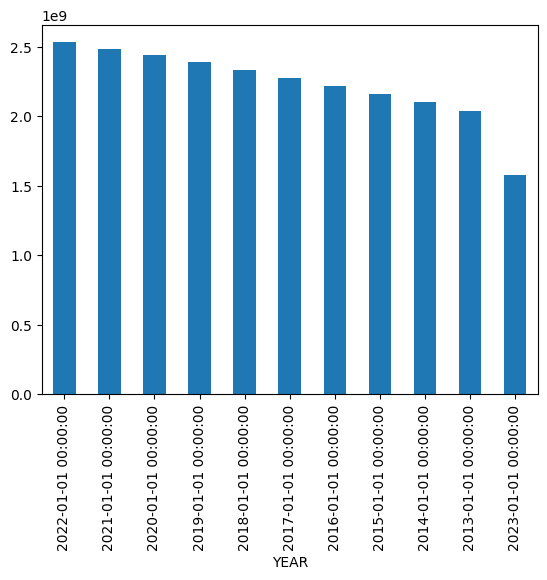

In [52]:
import matplotlib.pyplot as plt
data.groupby('YEAR')['TOT_BENES'].sum().sort_values(ascending=False).plot(kind='bar')
plt.xlabel='YEAR'
plt.ylabel='sum of the benes'
plt.show()

<Axes: xlabel='YEAR'>

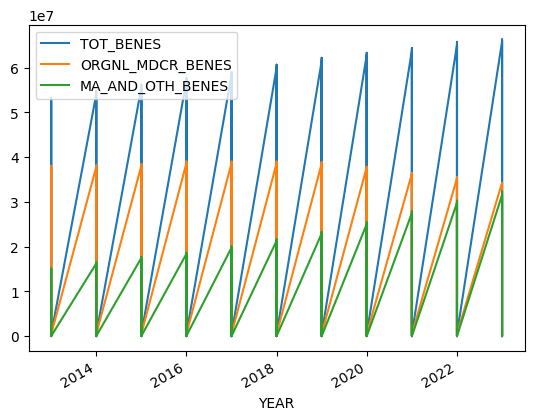

In [53]:
data.plot(kind='line')

In [54]:
data.groupby('YEAR')['TOT_BENES'].sum()


YEAR
2013-01-01    2039156901
2014-01-01    2100913634
2015-01-01    2158580259
2016-01-01    2216285369
2017-01-01    2273464376
2018-01-01    2333256143
2019-01-01    2392528386
2020-01-01    2444033508
2021-01-01    2484955344
2022-01-01    2532535591
2023-01-01    1581608546
Name: TOT_BENES, dtype: int64

In [55]:
data['TOT_BENES'].sum()

24557318057